## 注意

- このnotebookを実行する前に，このnotebookをGoogle Driveに保存してください．
- 方法は[第1週の学習用notebook](https://colab.research.google.com/github/yyamnk/numerical-methods-py3/blob/master/exp_python1.ipynb)を参照すること

# オイラー法を用いた質点の運動解析

前回のNotebookでは，運動方程式の解を求めて，その厳密解をplotした．

しかし，機械力学の応用で直面する場面では，厳密解を求めることが困難な問題が存在する．
そこで今回は，厳密解が求められなくても適用できる数値解析手法を学ぶ．

まず，代表的な手法であるオイラー法を使ってみよう．
以下では，まず一般的なオイラー法について学び，次に具体的な質点の運動にオイラー法を適用する．

## 対象とする微分方程式

オイラー法を適用するためには，対象となる運動方程式を次のような2階の常微分方程式として書き下すことから始める．
$$
\frac{d^2 x(t)}{dt^2} = Q\left(x(t), \frac{dx(t)}{dt}\right)
\tag{1}
$$

ここで，$x$は対象とする物体の変位，$Q$は任意の関数である．

式（1）の$Q$は，対象の運動によって変化するが，以下の説明では，任意の$Q$に対応できる形でオイラー法を導出する．
実際の解析では，対象とする系に応じて$Q$を適切に置き換えればよい．（具体例はこのnotebookの後半で扱う）

## 1階化

まず，2階の微分方程式(1)を1階化する．新しい変数$v(t) := \frac{dx(t)}{dt}$を導入することで，式(１)は

$$
\begin{cases}
 \frac{dx(t)}{dt} = v(t), \\
 \frac{dv(t)}{dt} = Q(x(t), v(t))
\end{cases}
\tag{2}
$$

と書き直すことができる．

## オイラー法の導出

式(2)を使って，オイラー法を導出しよう．

$h$を微小時間とし，$x(t + h)$をテイラー展開すると，

$$
x (t+h) = x(t) + \frac{dx(t)}{dt} h + \frac{1}{2!} \frac{d^2x(t)}{dt^2} h^2 + \cdots
$$

となる．1次の項のみで打ち切ると，

$$
x (t+h) \approx x(t) + \frac{dx(t)}{dt} h = x(t) + v(t) h
\tag{2}
$$

と近似できる．

この近似で得られるのは$h$ごとの解となるから，以降，これを$x_i := x(t_0 + i h)$, ただし$i=0, 1, 2, \ldots$, $t_0$は初期時刻，で表す．このとき，式(2)は次のようになる．

$$
x_{i+1} \approx x_i + v_i h
\tag{3}
$$

$v(t)$についても同様に，

$$
v(t+h) \approx v(t) + \frac{dv(t)}{dt} h = v(t) + Q(x(t), v(t)) h
$$

より，$v_i := v(t_0 + i h)$を用いて，

$$
v_{i+1} \approx v_i + Q(x_i, v_i)h
\tag{4}
$$

が得られる．この式（3,4）を逐次計算することで，微分方程式の解を求めるのがオイラー法である．

## オイラー法の実装

それでは，このオイラー法をPythonで実装してみよう．

ここでは，前回のnotebookで扱った，次の質点の運動を考える．
- 高さ$H$[m]のビルから，質量$m$[kg]の物体を水平に初速$v_x$[m/s]で投げ出す．
- 質点の高さを$y$[m], ビルからの距離を$x$[m]とする．
- 重力加速度を$g$ [m/s^2]とする．

シミュレーションの条件も前回と同様に，
- plotする時刻$t$の範囲と刻み：0 [s] から10 [s]まで 0.1[s]刻み
- $H = 333$ [m]
- $g = 9.8$ [m/s^2]
- $v_x = 30$ [m/s]
とする．

In [1]:
# 計算条件を変数として定義
H = 333
g = 9.8
vx0 = 30
h = 0.1 # 刻み時間
t_start = 0 # start time
t_end = 10 # end time

### オイラー法の実装ー手順1：微分方程式を求める

式（１）の形で微分方程式を求める．

今回の$x$と$y$に関する運動方程式を式（1）の微分方程式で表すと，
$$
\frac{d^2 x(t)}{dt^2} = 0, \quad (Q = 0)
\tag{5}
$$

$$
\frac{d^2 y(t)}{dt^2} = -g, \quad (Q = -g)
\tag{6}
$$

となる．

### オイラー法の実装ー手順2：関数$Q$を実装する

平面運動なので，$x$と$y$について$Q$を実装する必要がある．

In [2]:
def Qx(x, vx):
    return 0 # 式(5)

def Qy(y, vy):
    return -g # 式(6)

### オイラー法の実装ー手順3：オイラー法を実装する

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def Euler(Qx, Qy):
    # 結果保存用の配列定義
    ts = np.arange(start=t_start, stop=t_end, step=h) # tの時系列
    xs = np.zeros(len(ts)) # xの時系列
    vxs = np.zeros(len(ts)) # xの速度の時系列
    ys = np.zeros(len(ts)) # yの時系列
    vys = np.zeros(len(ts)) # yの速度の時系列
    # 初期値の代入
    xs[0] = 0 # x初期位置
    vxs[0] = vx0 # vx初期速度 
    ys[0] = H # y初期位置
    vys[0] = 0 # vy初期速度
    for i in range(1, len(ts)): # 初期値から最終値までループ
        # xについて
        vxs[i] = vxs[i-1] + Qx(xs[i-1], vxs[i-1]) * h # 式(4)
        xs[i] = xs[i-1] + vxs[i] * h # 式(5)
        # yについて
        vys[i] = vys[i-1] + Qy(ys[i-1], vys[i-1]) * h # 式(4)
        ys[i] = ys[i-1] + vys[i] * h # 式(5)
    return ts, vxs, xs, vys, ys

### オイラー法の動作確認

<font color="red">
（TODO）実装したオイラー法を用いて，質点の運動を横軸にxs，縦軸にysをplotしてシミュレーションせよ．
    また，前回のnotebookでplotした厳密解と比較せよ．
</font>

Text(0, 0.5, 'y [m]')

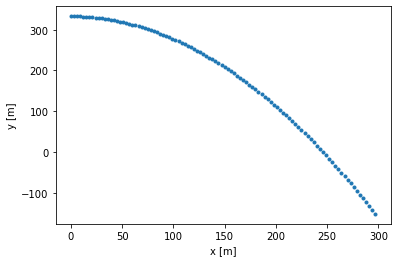

In [5]:
ts, vxs, xs, vys, ys = Euler(Qx, Qy)
plt.plot(xs, ys, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

## オイラー法の練習問題

上記のシミュレーションでは，$y<0$でも質点が落下し続け，質点が床にめり込んでしまっている．

一方，実世界では質点は床で反発するはずである．
これを実現するには，次のようにモデリングすればよい（詳しくはロボット力学の授業で扱うので，そちらも参考にすること）

$$
Q_y(y(t), v_y(t)) = 
\begin{cases}
    -g, \quad \mbox{for } y \ge 0\\
    -k y(t) + -c v_y(t) \quad \mbox{for } y < 0,
\end{cases}
$$

上記の$Q_y$をPythonで実装すると，次のようになる．

In [8]:
k = 80 # この値は参考値
c = 2 # 参考値

def Qy2(y, vy):
    if y < 0:
        return - c * vy - k * y
    else:
        return -g # 式(6)

<font color="red">
（TODO）実装した関数Qy2を使って，床で反発する質点の運動を横軸にxs，縦軸にysをplotしてシミュレーションせよ．ただし，t = 30[s]までシミュレーションすること．
</font>

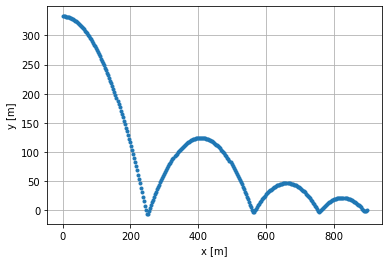

In [9]:
t_end = 30 # end time

ts, vxs, xs, vys, ys = Euler(Qx, Qy2)
plt.plot(xs, ys, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid()